# Welcome to the Galaxy's GPU enabled Interactive Jupyter Lab for Machine Learning.

The jupyter notebook is powered by the latest Jupyter Lab (3.0.7) and Tensorflow (2.4.1) which can be used to prototype and develop machine learning and deep learning solutions executing on Galaxy's NVIDIA GPUs. The docker container used can be found at [website](https://github.com/anuprulez/ml-jupyter-notebook/tree/galaxy-inte-docker-ml-jupyter).

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
tf.__version__

'2.4.1'

### Resources

In [3]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


### An example neural network created with Tensorflow

#### Collect data

In [9]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

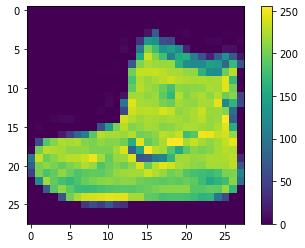

In [6]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [7]:
train_images = train_images / 255.0

test_images = test_images / 255.0

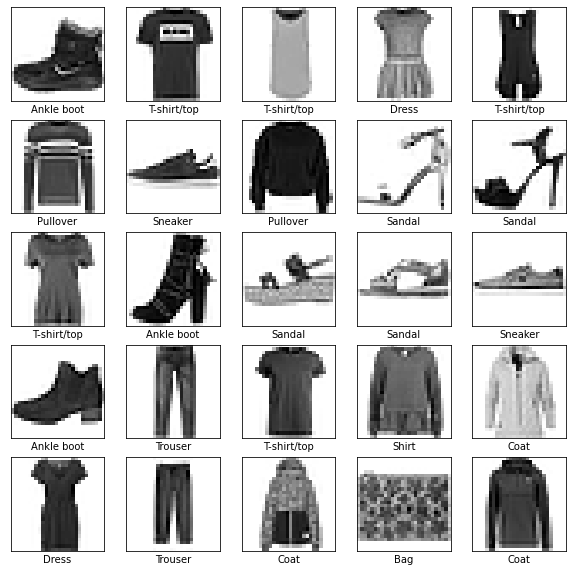

In [8]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

#### Define neural network architecture

In [9]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [10]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [11]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 3ms/step - loss: 0.6339 - accuracy: 0.7850
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3878 - accuracy: 0.8588
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3426 - accuracy: 0.8757
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3126 - accuracy: 0.8853
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2926 - accuracy: 0.8941
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2791 - accuracy: 0.8955
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2663 - accuracy: 0.9024
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2571 - accuracy: 0.9031
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2516 - accuracy: 0.9065
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.236

In [12]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3497 - accuracy: 0.8768

Test accuracy: 0.876800000667572


In [13]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [14]:
predictions = probability_model.predict(test_images)

In [15]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

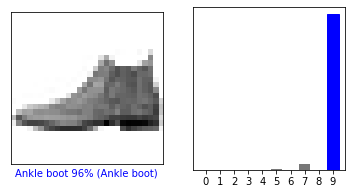

In [16]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

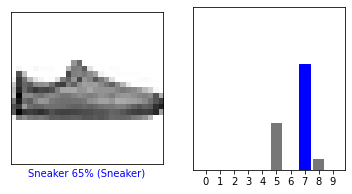

In [17]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

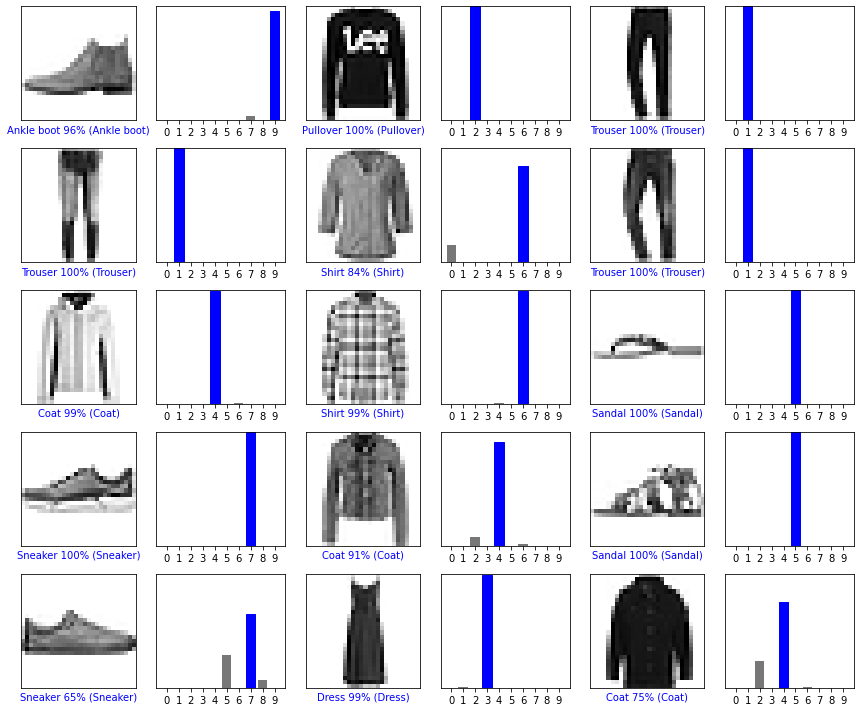

In [18]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [19]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


In [20]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [21]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[1.7195138e-04 3.5379597e-16 9.9939072e-01 3.9660381e-13 3.9124180e-04
  1.7586149e-15 4.6144964e-05 4.4901135e-22 9.3525686e-13 5.8662888e-17]]


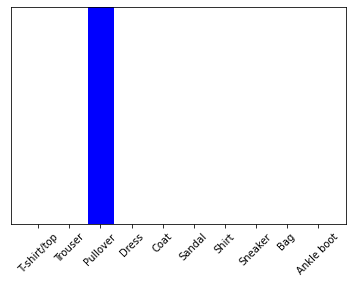

In [22]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [23]:
np.argmax(predictions_single[0])

2